#### For a family of stocks, generally belonging to the same sector or industry, there exists a correlation between prices of each of the stocks. There, though, exist anomalous times when for a small period of time, the correlation is broken. But the market self corrects in some time and the correlation is re-established.
#### During this small window of time when correlation is anomalous, there exists a money-making opportunity for quantitative traders.
#### Develop Machine Learning Algorithm to predict statistical arbitrage opportunities in NSE based on the 2016 data. Test this algorithm on 2017 data.


In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.metrics import recall_score, precision_score

1)Read Data

2)Iterates over the DataFrame columns, returning a tuple with the column name and the content as a Series. The index of the row.

3)Converting 20MICRONS dataframe to CSV

In [4]:
df = pd.read_csv('nse_data.csv')

data = []

for index,rows in df.iterrows():
    if rows[0] == '20MICRONS':
        data.append(list(rows))
stocks = pd.DataFrame(data,columns = df.columns)
stocks.to_csv('20microns.csv' , sep = ',')

In [5]:
#Setting a figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [6]:
stocks = pd.read_csv('20microns.csv')
print(stocks.head())

   Unnamed: 0     SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
0           0  20MICRONS     EQ  37.80  37.80  36.15  36.85  37.40      37.05   
1           1  20MICRONS     EQ  52.90  61.70  52.90  59.40  59.65      52.80   
2           2  20MICRONS     EQ  36.15  36.30  35.60  36.05  36.00      35.65   
3           3  20MICRONS     EQ  44.35  44.80  43.55  43.90  43.60      44.80   
4           4  20MICRONS     EQ  36.00  36.75  34.20  34.90  34.90      35.40   

   TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
0      27130  9.946579e+05  2017-06-28          202  INE144J01027  
1    2489935  1.481265e+08  2017-11-28        14196  INE144J01027  
2      40594  1.461975e+06  2017-02-28          193  INE144J01027  
3      90170  3.984352e+06  2017-04-28          597  INE144J01027  
4      77310  2.709788e+06  2017-03-20          413  INE144J01027  


In [7]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 14 columns):
Unnamed: 0     495 non-null int64
SYMBOL         495 non-null object
SERIES         495 non-null object
OPEN           495 non-null float64
HIGH           495 non-null float64
LOW            495 non-null float64
CLOSE          495 non-null float64
LAST           495 non-null float64
PREVCLOSE      495 non-null float64
TOTTRDQTY      495 non-null int64
TOTTRDVAL      495 non-null float64
TIMESTAMP      495 non-null object
TOTALTRADES    495 non-null int64
ISIN           495 non-null object
dtypes: float64(7), int64(3), object(4)
memory usage: 54.3+ KB


In [8]:
stocks.describe()

,Unnamed: 0,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,4.950000e+02,495.000000
mean,247.000000,37.377980,38.332323,36.278889,37.108788,37.115455,37.064747,1.475904e+05,6.485095e+06,817.303030
std,143.038456,7.214625,7.644051,7.011497,7.232672,7.240222,7.169471,2.837671e+05,1.444206e+07,1531.289082
min,0.000000,25.800000,26.250000,25.000000,25.450000,25.950000,25.450000,2.890000e+03,8.214380e+04,45.000000
25%,123.500000,32.400000,33.325000,31.425000,32.275000,32.300000,32.275000,2.851150e+04,9.293965e+05,188.500000
50%,247.000000,36.900000,37.800000,36.100000,36.700000,36.700000,36.650000,5.933200e+04,2.228396e+06,330.000000
75%,370.500000,40.325000,41.475000,39.200000,40.000000,40.050000,40.000000,1.512600e+05,5.958385e+06,775.000000
max,494.000000,63.000000,63.800000,59.250000,62.700000,62.600000,62.700000,2.699921e+06,1.488829e+08,17244.000000


Time Series Analysis to separate test from train data.

In [9]:
start16 = datetime(2016 , 1 , 1)
end16 = datetime(2016 , 12 , 31)
stamp16 = pd.date_range(start16 , end16)

start17 = datetime(2017 , 1 , 1)
end17 = datetime(2017 , 12 , 31)
stamp17 = pd.date_range(start17 , end17)

HL_PCT = ( [ HIGH — LOW ] / LOW ) * 100

Replaced both HIGH and LOW features with HL_PCT.

New dataset

In [10]:
stocks['Date'] = pd.to_datetime(stocks.TIMESTAMP,format ='%Y-%m-%d')
stocks.index = stocks['Date']

In [11]:
stocks = stocks[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'TOTTRDQTY', 'Date', 
                 'PREVCLOSE', 'TOTTRDVAL', 'TOTALTRADES']]
stocks['HL_PCT'] = (stocks['HIGH'] - stocks['LOW']) / stocks['LOW'] * 100.0

stocks.index = stocks['Date']

C:\Users\Pavani\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Seperating Train and test data

In [14]:
train = []
test = []
for index , rows in stocks.iterrows():
    if index in stamp16:
        train.append(list(rows))
    if index in stamp17:
        test.append(list(rows))
        
train = pd.DataFrame(train , columns = stocks.columns)
test = pd.DataFrame(test , columns= stocks.columns)
    

In [15]:
print(train.head())
print(test.head())

    OPEN   HIGH    LOW  CLOSE  TOTTRDQTY       Date  PREVCLOSE    TOTTRDVAL  \
0  33.90  35.00  32.25   33.0      48174 2016-04-21      33.75   1593805.60   
1  32.30  33.70  31.80   32.7      12513 2016-05-13      32.30    409528.50   
2  32.30  32.80  31.55   32.2      28846 2016-05-06      32.00    930147.40   
3  27.55  28.50  26.90   27.3      82651 2016-03-29      27.55   2283316.35   
4  38.50  40.75  36.80   38.6     565195 2016-08-17      39.20  21912747.75   

   TOTALTRADES     HL_PCT  
0          253   8.527132  
1          149   5.974843  
2          104   3.961965  
3          263   5.947955  
4         2267  10.733696  
    OPEN   HIGH    LOW  CLOSE  TOTTRDQTY       Date  PREVCLOSE     TOTTRDVAL  \
0  37.80  37.80  36.15  36.85      27130 2017-06-28      37.05  9.946579e+05   
1  52.90  61.70  52.90  59.40    2489935 2017-11-28      52.80  1.481265e+08   
2  36.15  36.30  35.60  36.05      40594 2017-02-28      35.65  1.461975e+06   
3  44.35  44.80  43.55  43.90      90

Extracting data from dictionaries:

PRE-PROCESSING TRAIN DATA:

convert pandas Dataframe to Numpy array

In [16]:
#convert a dataframe into a dictionary of series or list  
#like data type depending on orient parameter. 
X_train = train[['HIGH', 'LOW', 'OPEN', 'TOTTRDQTY', 
                 'TOTTRDVAL', 'TOTALTRADES']]

x_train = X_train.to_dict(orient = 'records')
#Transforms lists of feature-value mappings to vectors. 
vec = DictVectorizer()
X = vec.fit_transform(x_train).toarray()
Y= np.asarray(train.CLOSE)
Y = Y.astype('int')

PRE-PROCESSING TEST DATA:

In [17]:
X_test = test[['HIGH', 'LOW', 'OPEN', 'TOTTRDQTY',
               'TOTTRDVAL', 'TOTALTRADES']]
x_test = X_test.to_dict(orient='records')
vec = DictVectorizer()
x = vec.fit_transform(x_test).toarray()
y = np.asarray(test.CLOSE)
y = y.astype('int')

In [18]:
from sklearn.linear_model import TheilSenRegressor
from sklearn.datasets import make_regression

CLASSIFIER:

Theil–Sen estimator: of a set of two-dimensional points (xi,yi) is the median m of the 

slopes (yj − yi)/(xj − xi) determined by all pairs of sample points.

TheilSen Regressor is one of the best regression classifier for our data.

Method for robustly fitting a line to sample points in the plane (simple linear regression) by choosing the median of the slopes of all lines through pairs of points.

In [19]:
clf = TheilSenRegressor()
clf.fit(X,Y)

print("Accuracy of this Statistical Arbitrage model is: ",clf.score(x,y))

predict = clf.predict(x)

test['predict'] = predict

Accuracy of this Statistical Arbitrage model is:  0.9635194932583315


Accuracy score of our model is 96.4% which is decent for a yearly predictions. 

The graph plotted between stock values/price and date along with prediction over 2017 dataset :


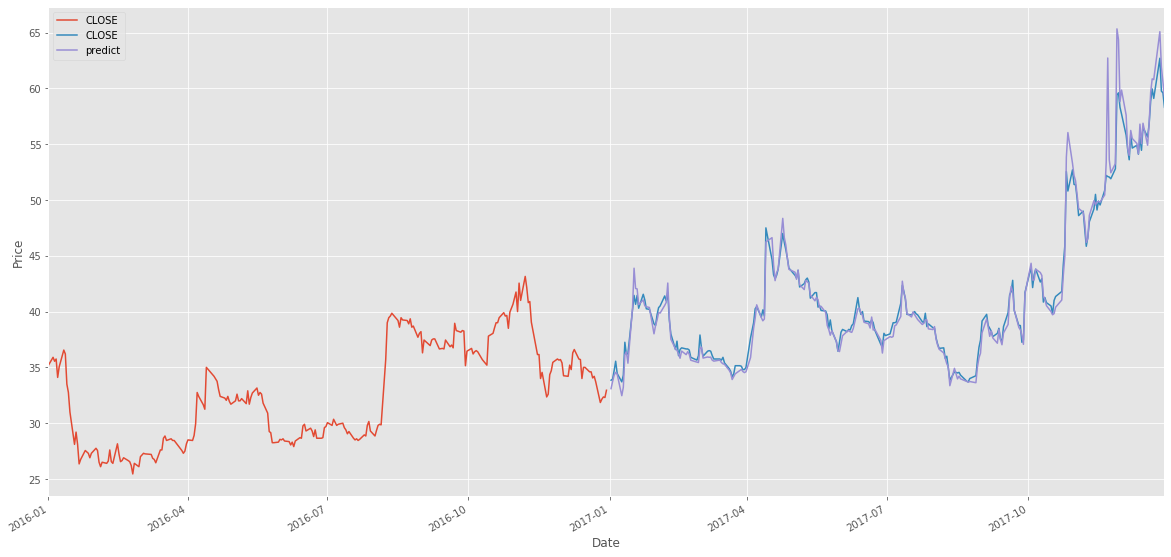

In [20]:
#plot

train.index = train.Date
test.index = test.Date
train['CLOSE'].plot()
test['CLOSE'].plot()
test['predict'].plot()
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()